<h1>Tackling an open problem</h1>

For this homework the idea is to hone our skills on exploring and plotting a dataset. You can either work with the Pokemon dataset that was given or download your own. If you opt to download your own I recommend you use one of the datasets available on kaggle,

https://www.kaggle.com/datasets

As they tend to be found in a clean format and are generally free to use.

Largely, the main objective is learning how to search the internet for new implementations you want to use on your code helping you develop your self-confidence.

There's no right or wrong, pick a dataset you enjoy and try to have some fun.
If you need, use the notebook from the previous session as a guideline.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pokemon_df = pd.read_csv('Pokemon.csv', sep=',')

In [3]:
print(pokemon_df)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

In [5]:
attack_values = pokemon_df['Attack']

In [6]:
print(attack_values)

0       49
1       62
2       82
3      100
4       52
      ... 
795    100
796    160
797    110
798    160
799    110
Name: Attack, Length: 800, dtype: int64


In [7]:
grass_pokemon = pokemon_df[pokemon_df['Type 1'] == 'Grass']

In [8]:
print(grass_pokemon)

       #                   Name Type 1    Type 2  Total   HP  Attack  Defense  \
0      1              Bulbasaur  Grass    Poison    318   45      49       49   
1      2                Ivysaur  Grass    Poison    405   60      62       63   
2      3               Venusaur  Grass    Poison    525   80      82       83   
3      3  VenusaurMega Venusaur  Grass    Poison    625   80     100      123   
48    43                 Oddish  Grass    Poison    320   45      50       55   
..   ...                    ...    ...       ...    ...  ...     ...      ...   
718  650                Chespin  Grass       NaN    313   56      61       65   
719  651              Quilladin  Grass       NaN    405   61      78       95   
720  652             Chesnaught  Grass  Fighting    530   88     107      122   
740  672                 Skiddo  Grass       NaN    350   66      65       48   
741  673                 Gogoat  Grass       NaN    531  123     100       62   

     Sp. Atk  Sp. Def  Spee

In [9]:
average_total = pokemon_df['Total'].mean()
print(average_total)

435.1025


In [12]:
fire_pokemon_with_high_attack = pokemon_df[(pokemon_df['Type 1'] == 'Fire') & (pokemon_df['Attack'] > 50)]
print(fire_pokemon_with_high_attack)

       #                       Name Type 1    Type 2  Total   HP  Attack  \
4      4                 Charmander   Fire       NaN    309   39      52   
5      5                 Charmeleon   Fire       NaN    405   58      64   
6      6                  Charizard   Fire    Flying    534   78      84   
7      6  CharizardMega Charizard X   Fire    Dragon    634   78     130   
8      6  CharizardMega Charizard Y   Fire    Flying    634   78     104   
43    38                  Ninetales   Fire       NaN    505   73      76   
63    58                  Growlithe   Fire       NaN    350   55      70   
64    59                   Arcanine   Fire       NaN    555   90     110   
83    77                     Ponyta   Fire       NaN    410   50      85   
84    78                   Rapidash   Fire       NaN    500   65     100   
135  126                     Magmar   Fire       NaN    495   65      95   
147  136                    Flareon   Fire       NaN    525   65     130   
158  146    

In [16]:
type1_summary = pokemon_df.groupby('Type 1').agg({
    'Total': 'mean',
    'HP': 'max',
    'Attack': 'min'
}).reset_index()


In [17]:
print(type1_summary)

      Type 1       Total   HP  Attack
0        Bug  378.927536   86      10
1       Dark  445.741935  126      50
2     Dragon  550.531250  125      50
3   Electric  443.409091   90      30
4      Fairy  413.176471  126      20
5   Fighting  416.444444  144      35
6       Fire  458.076923  115      30
7     Flying  485.000000   85      30
8      Ghost  439.562500  150      30
9      Grass  421.142857  123      27
10    Ground  437.500000  115      40
11       Ice  433.458333  110      30
12    Normal  401.683673  255       5
13    Poison  399.142857  105      43
14   Psychic  475.947368  190      20
15      Rock  453.750000  123      40
16     Steel  487.703704  100      24
17     Water  430.455357  170      10


In [18]:
pivot_table = pokemon_df.pivot_table(values=['Total'], index=['Type 1'], columns=['Type 2'], aggfunc='mean', fill_value=0)

In [19]:
print("\nPivot Table:\n", pivot_table)


Pivot Table:
          Total                                                      \
Type 2     Bug        Dark Dragon Electric       Fairy    Fighting   
Type 1                                                               
Bug          0    0.000000    0.0    395.5    0.000000  550.000000   
Dark         0    0.000000  440.0      0.0    0.000000  418.000000   
Dragon       0    0.000000    0.0    680.0  590.000000    0.000000   
Electric     0    0.000000  610.0      0.0  431.000000    0.000000   
Fairy        0    0.000000    0.0      0.0    0.000000    0.000000   
Fighting     0  495.000000    0.0      0.0    0.000000    0.000000   
Fire         0    0.000000  634.0      0.0    0.000000  492.857143   
Flying       0    0.000000  390.0      0.0    0.000000    0.000000   
Ghost        0  485.000000  680.0      0.0    0.000000    0.000000   
Grass        0  431.666667  630.0      0.0  380.000000  523.333333   
Ground       0  387.333333  430.0    471.0    0.000000    0.000000   
Ice  

In [20]:
my_pokedex = pokemon_df[['Name', 'Type 1', 'HP', 'Attack', 'Defense']].copy()
my_pokedex.columns = ['Pokemon', 'Type', 'HP', 'Attack', 'Defense']
print("\nmy_pokedex Dataset:\n", my_pokedex)


my_pokedex Dataset:
                    Pokemon     Type  HP  Attack  Defense
0                Bulbasaur    Grass  45      49       49
1                  Ivysaur    Grass  60      62       63
2                 Venusaur    Grass  80      82       83
3    VenusaurMega Venusaur    Grass  80     100      123
4               Charmander     Fire  39      52       43
..                     ...      ...  ..     ...      ...
795                Diancie     Rock  50     100      150
796    DiancieMega Diancie     Rock  50     160      110
797    HoopaHoopa Confined  Psychic  80     110       60
798     HoopaHoopa Unbound  Psychic  80     160       60
799              Volcanion     Fire  80     110      120

[800 rows x 5 columns]


In [22]:
my_pokedex = my_pokedex.sort_values(by='Pokemon')

In [23]:
print("\nmy_pokedex Dataset (Alphabetically Sorted by Pokemon):\n", my_pokedex)


my_pokedex Dataset (Alphabetically Sorted by Pokemon):
                      Pokemon     Type   HP  Attack  Defense
510                Abomasnow    Grass   90      92       75
511  AbomasnowMega Abomasnow    Grass   90     132      105
68                      Abra  Psychic   25      20       15
392                    Absol     Dark   65     130       60
393          AbsolMega Absol     Dark   65     150       60
..                       ...      ...  ...     ...      ...
632                  Zoroark     Dark   60     105       60
631                    Zorua     Dark   40      65       40
46                     Zubat   Poison   40      45       35
695                 Zweilous     Dark   72      85       70
794         Zygarde50% Forme   Dragon  108     100      121

[800 rows x 5 columns]


In [25]:
average_hp_by_type = my_pokedex.groupby('Type')['HP'].mean().reset_index()

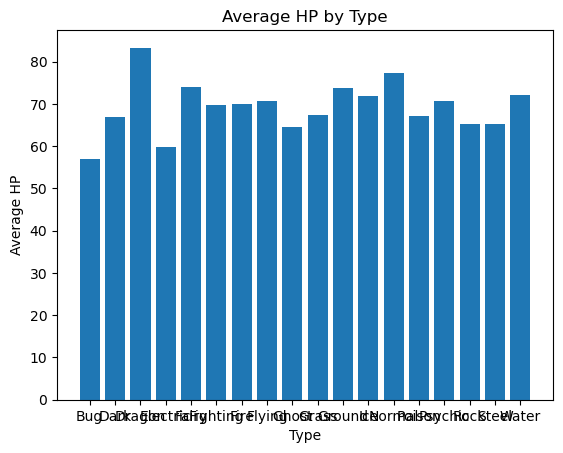

In [26]:
plt.bar(average_hp_by_type['Type'], average_hp_by_type['HP'])
plt.xlabel('Type')
plt.ylabel('Average HP')
plt.title('Average HP by Type')
plt.show()

In [29]:
pokemon_starting_with_b = my_pokedex[my_pokedex['Pokemon'].str.startswith('B')]
print("\nPokémon whose names begin with 'B':\n", pokemon_starting_with_b)


Pokémon whose names begin with 'B':
                      Pokemon      Type   HP  Attack  Defense
406                    Bagon    Dragon   45      75       60
375                   Baltoy    Ground   40      40       55
386                  Banette     Ghost   64     115       65
387      BanetteMega Banette     Ghost   64     165       75
759               Barbaracle      Rock   72     105      115
371                 Barboach     Water   50      48       43
610                 Basculin     Water   70      92       65
456                Bastiodon      Rock   60      52      168
167                  Bayleef     Grass   60      62       80
675                  Beartic       Ice   95     110       80
290                Beautifly       Bug   60      70       50
18                  Beedrill       Bug   65      90       40
19     BeedrillMega Beedrill       Bug   65     150       40
667                 Beheeyem   Psychic   75      75       75
410                   Beldum     Steel   40    